In [79]:
# importing libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# dataset path
trainingDataset = "./dataset/Training/"
testingDataset = "./dataset/Testing/"

In [15]:
# printing list Tumours we are classifying
classes = [file for file in os.listdir(trainingDataset)]
print("The following classes of Tumours are to be classified")
print(classes)
if  ".DS_Store" in classes:
    classes.remove(".DS_Store")

The following classes of Tumours are to be classified
['no_tumor', '.DS_Store', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']


In [43]:
# function to load and preprocess
def loader(directory):
    dataset = []
    labels = []
    labelMapping = {
        'no_tumor': 0,
        'pituitary_tumor': 1,
        'meningioma_tumor': 2,
        'glioma_tumor': 3
    }
    tempCount = {}
    for file in os.listdir(directory):
        if file == ".DS_Store":
            continue
        path = os.path.join(directory, file)
        for im in os.listdir(path):
            image = cv2.imread(os.path.join(path, im), 0)
            
            image = cv2.resize(image, (150,150))
            image = np.array(image)
            image = image / 255.0
            label = path.split("/")[-1]
            if label not in tempCount:
                tempCount[label] = 1
            else:
                tempCount[label] += 1
            if tempCount[label] <= 750:
                dataset.append(image)
                labels.append(labelMapping[label])
    return np.array(dataset), np.array(labels)

In [44]:
# loading trianing datasets
xtrain, ytrain = loader(trainingDataset)
xtest, ytest = loader(testingDataset)

In [45]:
# displaying the shape of the dataset
print((xtrain.shape, ytrain.shape, xtest.shape, ytest.shape))

((2645, 150, 150), (2645,), (394, 150, 150), (394,))


In [46]:
classes

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

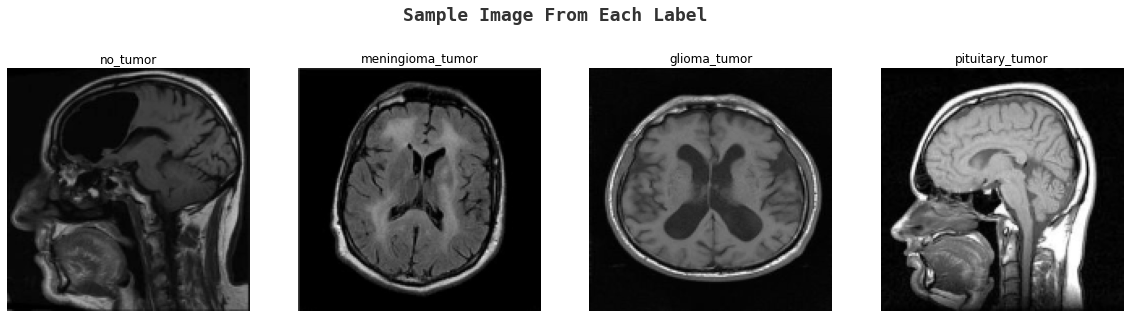

In [47]:
# displaying training images
k = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
labelMapping = {
    0: 'no_tumor',
    1: 'pituitary_tumor',
    2: 'meningioma_tumor',
    3: 'glioma_tumor'
}
fig.text(s='Sample Image From Each Label',
         size=18,
         fontweight='bold',
         fontname='monospace',
         y=0.62,
         x=0.4,
         alpha=0.8)
for i in classes:
    j = 0
    while True:
        if labelMapping[j] == i:
            ax[k].imshow(xtrain[j], cmap='gray')
            ax[k].set_title(labelMapping[j])
            ax[k].axis('off')
            k += 1
            break
        j += 1

In [48]:
# convert 2d data into 1D array
xtrain = xtrain.reshape(xtrain.shape[0], 150 * 150)
xtest = xtest.reshape(xtest.shape[0], 150 * 150)

In [49]:
print("Training data shape {}".format(xtrain.shape))
print("Testing data shape {}".format(xtest.shape))

Training data shape (2645, 22500)
Testing data shape (394, 22500)


In [50]:
# defining models
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=100)
ADA = AdaBoostClassifier(n_estimators=100)
KNN = KNeighborsClassifier()

In [51]:
LR.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [52]:
RF.fit(xtrain, ytrain)

RandomForestClassifier()

In [53]:
ADA.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=100)

In [54]:
KNN.fit(xtrain, ytrain)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       1.00      0.62      0.76       170
           1       0.66      0.86      0.75        57
           2       0.92      0.76      0.83       139
           3       0.26      0.93      0.41        28

    accuracy                           0.73       394
   macro avg       0.71      0.79      0.69       394
weighted avg       0.87      0.73      0.76       394



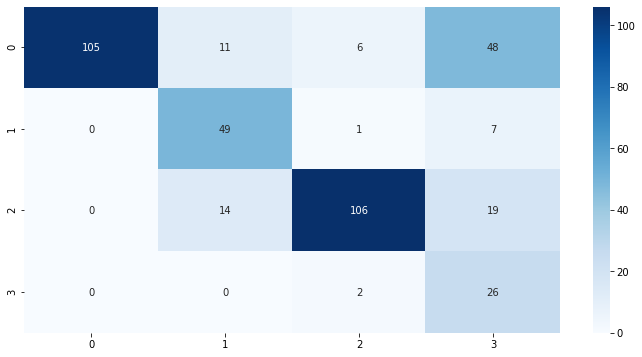

In [55]:
# classification report
predictions = LR.predict(xtest)
print(classification_report(predictions, ytest))

# confusion matrix
plt.figure(figsize=[12, 6])
sns.heatmap(confusion_matrix(predictions, ytest),
            annot=True,
            fmt="d",
            cmap="Blues")
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.49      0.66       214
           1       0.47      0.85      0.61        41
           2       0.91      0.87      0.89       121
           3       0.17      0.94      0.29        18

    accuracy                           0.66       394
   macro avg       0.64      0.79      0.61       394
weighted avg       0.88      0.66      0.71       394



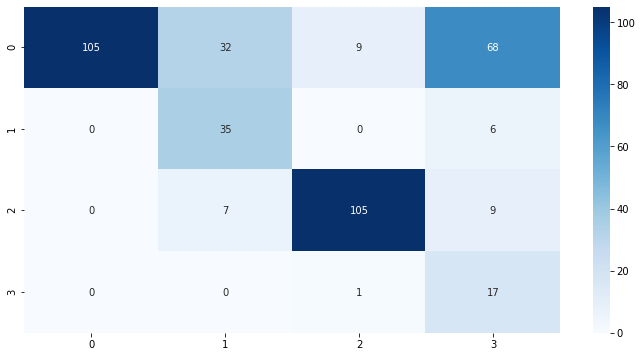

In [56]:
# classification report
predictions = RF.predict(xtest)
print(classification_report(predictions, ytest))

# confusion matrix
plt.figure(figsize=[12, 6])
sns.heatmap(confusion_matrix(predictions, ytest),
            annot=True,
            fmt="d",
            cmap="Blues")
plt.show()


              precision    recall  f1-score   support

           0       0.89      0.35      0.50       269
           1       0.15      0.65      0.24        17
           2       0.29      0.37      0.32        90
           3       0.14      0.78      0.24        18

    accuracy                           0.38       394
   macro avg       0.37      0.53      0.32       394
weighted avg       0.68      0.38      0.43       394



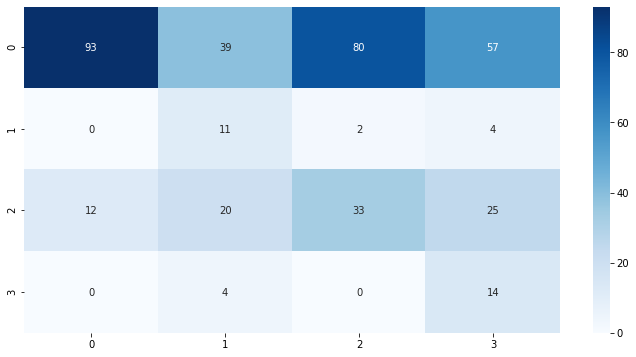

In [57]:
# classification report
predictions = ADA.predict(xtest)
print(classification_report(predictions, ytest))

# confusion matrix
plt.figure(figsize=[12, 6])
sns.heatmap(confusion_matrix(predictions, ytest),
            annot=True,
            fmt="d",
            cmap="Blues")
plt.show()


              precision    recall  f1-score   support

           0       0.82      0.44      0.57       196
           1       0.70      0.55      0.62        94
           2       0.31      0.69      0.43        52
           3       0.25      0.48      0.33        52

    accuracy                           0.51       394
   macro avg       0.52      0.54      0.49       394
weighted avg       0.65      0.51      0.53       394



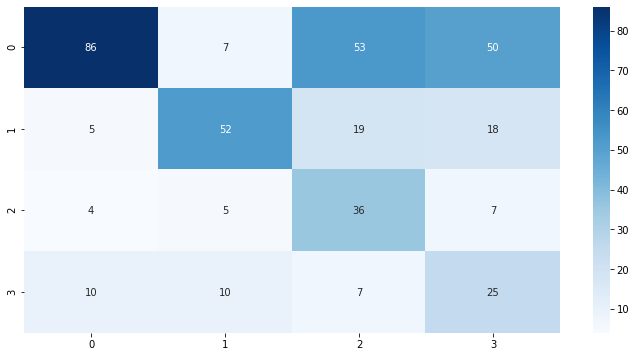

In [58]:
# classification report
predictions = KNN.predict(xtest)
print(classification_report(predictions, ytest))

# confusion matrix
plt.figure(figsize=[12, 6])
sns.heatmap(confusion_matrix(predictions, ytest),
            annot=True,
            fmt="d",
            cmap="Blues")
plt.show()



In [80]:
# predictions
lrPredict = LR.predict(xtest)
rfPredict = RF.predict(xtest)
adaPredict = ADA.predict(xtest)
knnPredict = KNN.predict(xtest)

In [100]:
df = pd.DataFrame(columns=['Metrics', "Score", "Model"])
index = ['Metrics', "Score", "Model"]

In [101]:
df = df.append(pd.Series(
    ['Accuracy',
     accuracy_score(lrPredict, ytest), 'LogisticRegression'],
    index=index),
    ignore_index=True)
df = df.append(pd.Series(
    ['Accuracy',
     accuracy_score(rfPredict, ytest), 'RandomForestClassifier'],
    index=index),
    ignore_index=True)
df = df.append(pd.Series(
    ['Accuracy',
     accuracy_score(knnPredict, ytest), 'KNeighborsClassifier'],
    index=index),
    ignore_index=True)
df = df.append(pd.Series(
    ['Accuracy',
     accuracy_score(adaPredict, ytest), 'AdaBoostClassifier'],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Recall',
    recall_score(lrPredict, ytest, average='weighted'), 'LogisticRegression'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Recall',
    recall_score(rfPredict, ytest, average='weighted'),
    'RandomForestClassifier'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Recall',
    recall_score(knnPredict, ytest, average='weighted'), 'KNeighborsClassifier'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Recall',
    recall_score(adaPredict, ytest, average='weighted'), 'AdaBoostClassifier'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Precision',
    precision_score(lrPredict, ytest, average='weighted'), 'LogisticRegression'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Precision',
    precision_score(rfPredict, ytest, average='weighted'),
    'RandomForestClassifier'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Precision',
    precision_score(knnPredict, ytest, average='weighted'),
    'KNeighborsClassifier'
],
    index=index),
    ignore_index=True)
df = df.append(pd.Series([
    'Precision',
    precision_score(adaPredict, ytest, average='weighted'),
    'AdaBoostClassifier'
],
    index=index),
    ignore_index=True)

In [102]:
df

,Metrics,Score,Model
0,Accuracy,0.725888,LogisticRegression
1,Accuracy,0.664975,RandomForestClassifier
2,Accuracy,0.505076,KNeighborsClassifier
3,Accuracy,0.383249,AdaBoostClassifier
4,Recall,0.725888,LogisticRegression
5,Recall,0.664975,RandomForestClassifier
6,Recall,0.505076,KNeighborsClassifier
7,Recall,0.383249,AdaBoostClassifier
8,Precision,0.870926,LogisticRegression
9,Precision,0.880533,RandomForestClassifier


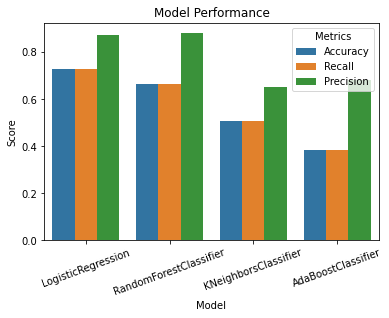

In [107]:
sns.barplot(x = "Model", y = "Score", hue = "Metrics", data = df)
plt.xticks(rotation=20)
plt.title("Model Performance")
plt.show()

In [59]:
# real time testing
img = cv2.imread("./dataset/Testing/meningioma_tumor/image(112).jpg", 0)
img = cv2.resize(img, (150,150))

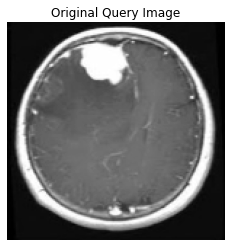

In [60]:
plt.grid()
plt.title("Original Query Image")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()


In [64]:
labelMapping = {
    0: 'no_tumor',
    1: 'pituitary_tumor',
    2: 'meningioma_tumor',
    3: 'glioma_tumor'
}

In [76]:
print("LogisticRegression Result")
label = LR.predict(img.reshape(1, 150 * 150))
score = LR.predict_proba(img.reshape(1, 150 * 150))
move_name = labelMapping[label[0]]
print(("Prediction is {} with confidence {:.2f}.".format(move_name, np.max(score))))

LogisticRegression Result
Prediction is meningioma_tumor with confidence 1.00.


In [75]:
print("RandomForestClassifier Result")
label = RF.predict(img.reshape(1, 150 * 150))
score = RF.predict_proba(img.reshape(1, 150 * 150))
move_name = labelMapping[label[0]]
print(("Prediction is {} with confidence {:.2f}.".format(move_name, np.max(score))))

RandomForestClassifier Result
Prediction is meningioma_tumor with confidence 0.51.


In [73]:
print("AdaBoostClassifier Result")
label = ADA.predict(img.reshape(1, 150 * 150))
score = ADA.predict_proba(img.reshape(1, 150 * 150))
move_name = labelMapping[label[0]]
print(("Prediction is {} with confidence {:.2f}.".format(move_name, np.max(score))))

AdaBoostClassifier Result
Prediction is no_tumor with confidence 0.72.


In [74]:
print("KNeighborsClassifier Result")
label = KNN.predict(img.reshape(1, 150 * 150))
score = KNN.predict_proba(img.reshape(1, 150 * 150))
move_name = labelMapping[label[0]]
print(("Prediction is {} with confidence {:.2f}.".format(move_name, np.max(score))))

KNeighborsClassifier Result
Prediction is meningioma_tumor with confidence 0.80.
